<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Sarina Heshmati


In [1]:
student_number = 'Reza Ghorbani Paji'
full_name = '403206565'
assert student_number and full_name is not None, 'please input your information'

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid")

## Overview

In this assignment, you will explore a dataset containing information about employees and use that data to train models capable of predicting whether those employees have left the company (attrited) or not. You will start by exploring the dataset, analyzing its features, and performing necessary preprocessing steps (such as label encoding and scaling). Then, you will build and evaluate implementations of K-Nearest Neighbors (KNN) as well as Random Forest, Bagging, and AdaBoost classifiers. After training and tuning each model, you’ll compare their performance using metrics like accuracy and feature importance to identify the best approach for accurate attrition prediction.

# Load and Explore Dataset (10 points)

In [3]:
import pandas as pd

# Load the dataset
# "Attrition" is our target columm

df = pd.read_csv('dataset.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


Explore the dataset and get familiar with its features and statistics. (don't worry about the 'masked values' in our target column. They are simply used to automatically test your model later on.)

In [11]:
# Check the basic structure of the dataset using .info() and .describe()
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       902 non-null    int64 
 1   Attrition                 902 non-null    object
 2   BusinessTravel            902 non-null    object
 3   DailyRate                 902 non-null    int64 
 4   Department                902 non-null    object
 5   DistanceFromHome          902 non-null    int64 
 6   Education                 902 non-null    int64 
 7   EducationField            902 non-null    object
 8   EmployeeCount             902 non-null    int64 
 9   EmployeeNumber            902 non-null    int64 
 10  EnvironmentSatisfaction   902 non-null    int64 
 11  Gender                    902 non-null    object
 12  HourlyRate                902 non-null    int64 
 13  JobInvolvement            902 non-null    int64 
 14  JobLe

In [13]:
print("\nSummary Statistics of Numeric Features:")
df.describe()


Summary Statistics of Numeric Features:


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,902.000000,902.000000,902.000000,902.000000,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,...,902.000000,902.0,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,36.832594,797.782705,9.433481,2.952328,1.0,1014.508869,2.688470,67.124169,2.721729,2.021064,...,2.694013,80.0,0.804878,11.043237,2.815965,2.743902,6.794900,4.144124,2.144124,3.936807
std,9.306933,405.292650,8.248331,1.041295,0.0,608.153731,1.103652,20.558087,0.710750,1.093112,...,1.083397,0.0,0.862113,7.810982,1.309680,0.708159,6.089151,3.647824,3.108697,3.480307
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,459.750000,2.000000,2.000000,1.0,477.250000,2.000000,49.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,801.500000,7.000000,3.000000,1.0,1001.500000,3.000000,67.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1156.250000,15.000000,4.000000,1.0,1553.750000,4.000000,85.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
# Check for any missing values in the dataset
print("\nMissing Values in each column:")
print(df.isnull().sum())


Missing Values in each column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

In [15]:
# Explore the target variable (Attrition)
print("\nDistribution of the target variable 'Attrition':")
print(df['Attrition'].value_counts())


Distribution of the target variable 'Attrition':
Attrition
No     713
Yes    189
Name: count, dtype: int64


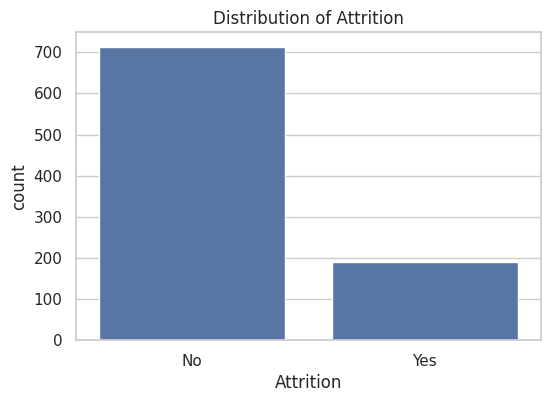

In [16]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.show()

It is generally better to remove columns with only one unique value from a DataFrame when preparing data for a decision tree. <br>
Such columns do not provide any useful information for splitting the data and can lead to unnecessary complexity in the model. Remove the said columns from the DataFrame.

In [17]:
# Measure and print the number of unique values for each column and remove columns with only one unique value

# Dictionary to store the number of unique values per column
unique_values = {col: df[col].nunique() for col in df.columns}

# Print the number of unique values for each column
print("Number of unique values in each column:")
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count}")

# Remove columns with less than 2 unique values
columns_to_remove = [col for col, unique_count in unique_values.items() if unique_count < 2]
df = df.drop(columns=columns_to_remove)

# Show the updated DataFrame columns
print("\nColumns after removal of single unique value columns:")
print(df.columns)

# Display the columns that were removed
print("\nRemoved columns:", columns_to_remove)


Number of unique values in each column:
Age: 42
Attrition: 2
BusinessTravel: 3
DailyRate: 653
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeNumber: 902
EnvironmentSatisfaction: 4
Gender: 2
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 853
MonthlyRate: 888
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 34
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 17

Columns after removal of single unique value columns:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfactio

Look at the DataFrame and try to gather insight into people's monthly income and things that generally affect this number.

<ipython-input-18-125cccad9fef>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='YearsAtCompany', y='MonthlyIncome', ci=None)


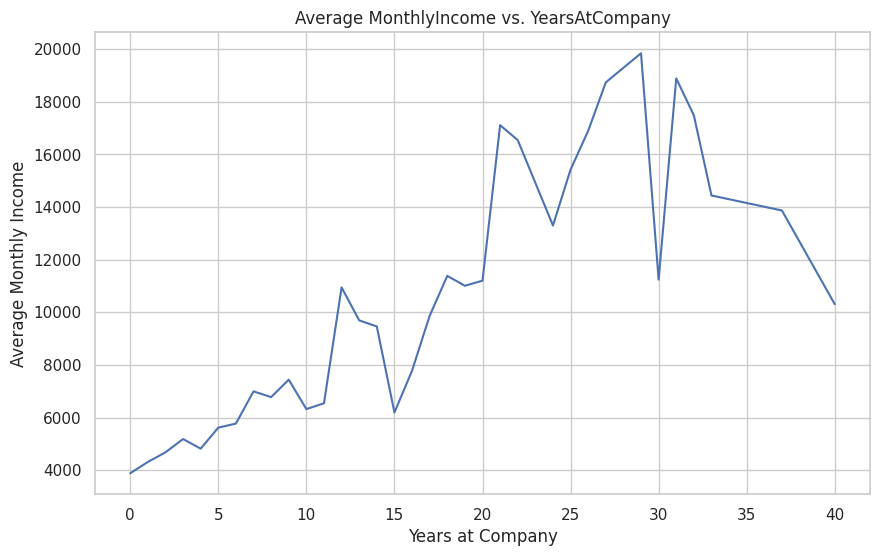

In [18]:
# Plotting the average MonthlyIncome against YearsAtCompany
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='YearsAtCompany', y='MonthlyIncome', ci=None)
plt.title("Average MonthlyIncome vs. YearsAtCompany")
plt.xlabel("Years at Company")
plt.ylabel("Average Monthly Income")
plt.show()

In [20]:
# Finding which departments have the highest and lowest average MonthlyIncome
avg_income_by_department = df.groupby('Department')['MonthlyIncome'].mean().sort_values(ascending=False)

# Display the departments with the highest and lowest average MonthlyIncome
highest_income_department = avg_income_by_department.idxmax()
lowest_income_department = avg_income_by_department.idxmin()

print("Department with the Highest Average MonthlyIncome:", highest_income_department, "->", avg_income_by_department[highest_income_department])
print("Department with the Lowest Average MonthlyIncome:", lowest_income_department, "->", avg_income_by_department[lowest_income_department])


Department with the Highest Average MonthlyIncome: Sales -> 6817.394366197183
Department with the Lowest Average MonthlyIncome: Research & Development -> 6073.644444444444


# Data Preprocessing (5 points)

Label Encode categorical columns and create a new DataFrame. Then split this data into train and test.

In [25]:
# Label encode all categorical columns
encoded_df = df.copy()
label_encoder = LabelEncoder()

# Identify categorical columns and apply label encoding
categorical_cols = encoded_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

In [26]:
# Split into features and target variable
X = encoded_df.drop(columns=['Attrition'])
y = encoded_df['Attrition']

# Perform a train-test split with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the resulting datasets to confirm split
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((631, 31), (271, 31), (631,), (271,))

# K-Nearest Neighbors (KNN) Model (15 points)

Implement KNN model from scratch.

In [27]:
import numpy as np
from collections import Counter

class CustomKNN:
    def __init__(self, k):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # Store the number of neighbors (k)
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (numpy array): Training feature vectors.
        - y_train (numpy array): Training labels.
        """
        # Store training data
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def euclidean_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Euclidean distance between x1 and x2.
        """
        # Calculate and return the Euclidean distance
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (numpy array): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        # Predict label for each test instance and return the array of predictions
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        # Compute distances from x to all training points
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

        # Find the indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Find the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Perform majority vote and return the most common label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


Fit and test your model using different k values and then choose the best one.

In [31]:
# Define the range of k values to test
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []

# Loop through each k value, fit the model, and evaluate accuracy
for k in k_values:
    # Initialize the CustomKNN model
    knn_model = CustomKNN(k=k)

    # Fit the model using the scaled training data
    knn_model.fit(X_train_scaled, y_train)

    # Make predictions on the scaled test data
    y_pred_custom = knn_model.predict(X_test_scaled)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred_custom)
    accuracies.append(accuracy)

    print(f'k: {k} - Accuracy: {accuracy:.4f}')

# Determine the best k value based on the highest accuracy
best_accuracy = max(accuracies)
best_k_index = accuracies.index(best_accuracy)
best_k = k_values[best_k_index]

# Save the best model parameters for later use
Best_custom_model = best_k

print(f'\nBest custom model k: {Best_custom_model} with accuracy: {best_accuracy:.4f}')

k: 1 - Accuracy: 0.7528
k: 3 - Accuracy: 0.7786
k: 5 - Accuracy: 0.8007
k: 7 - Accuracy: 0.8044
k: 9 - Accuracy: 0.8007
k: 11 - Accuracy: 0.8192
k: 13 - Accuracy: 0.7934
k: 15 - Accuracy: 0.8007

Best custom model k: 11 with accuracy: 0.8192


In [32]:
# Assuming the best custom model k was determined earlier
best_knn_model = CustomKNN(k=Best_custom_model)

# Fit the model using the scaled training data
best_knn_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_best = best_knn_model.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy of the best custom KNN model (k={Best_custom_model}): {accuracy_best:.4f}')

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Accuracy of the best custom KNN model (k=11): 0.8192

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       214
           1       0.83      0.18      0.29        57

    accuracy                           0.82       271
   macro avg       0.83      0.58      0.59       271
weighted avg       0.82      0.82      0.77       271



Visualize the confusion matrix for KNN predictions

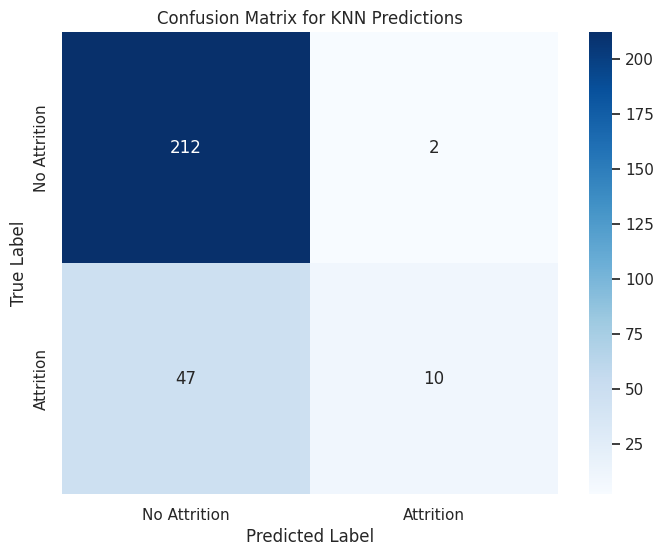

In [33]:
# Create a confusion matrix for KNN predictions
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix for KNN Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Evaluation (30 points)
In this part, we are going to evaluate your model's performance on another set of unseen data. Load test.csv (this data is already encoded), use your best_custom_model to predict and save the results in a DataFrame called 'result.csv'. The DataFrame should contain one column called 'target' that contains your model's predictions.

In [42]:
# Load test.csv
eval_df= pd.read_csv('test.csv')

# TODO: Use the old scaler to scale the data
eval_df_scaled = scaler.transform(eval_df)

# TODO: Predict using your model
y_pred_eval = best_knn_model.predict(eval_df_scaled)

Save the results in a DataFrame

In [43]:
# Save the results as a csv file
result_df= pd.DataFrame()
result_df['target']=pd.Series(y_pred_eval)
result_df.to_csv('result.csv', index= False)

# Random Forest Model (12 points)

Implement a random forest model using sklearn.

In [45]:
from collections import Counter

# Implement the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up a hyperparameter tuning process for Random Forest using GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV with Random Forest
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5)

# Fit the GridSearchCV on the training data to find the best parameters
rf_cv.fit(X_train_scaled, y_train)

# Use the best Random Forest model for predictions on the test data
y_pred_rf = rf_cv.best_estimator_.predict(X_test_scaled)

# Print the Random Forest model accuracy and classification report using sklearn's metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.8192

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       214
           1       0.68      0.26      0.38        57

    accuracy                           0.82       271
   macro avg       0.76      0.62      0.64       271
weighted avg       0.80      0.82      0.79       271



Visualize the confusion matrix for Random Forest predictions

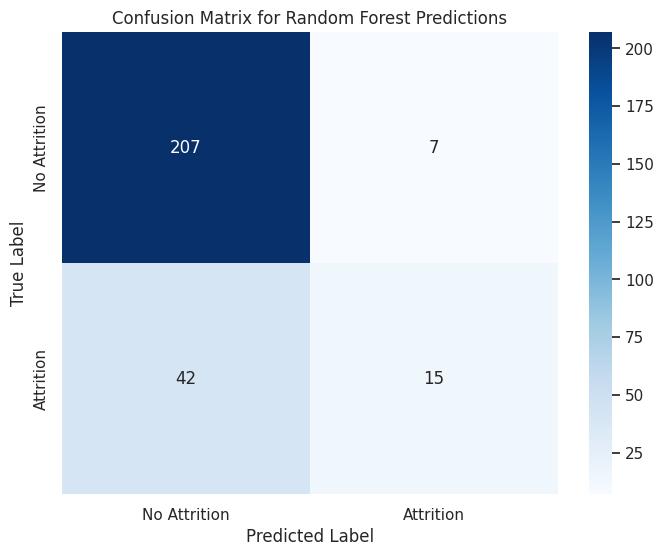

In [46]:
# Create a confusion matrix for Random Forest predictions
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix for Random Forest Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

A feature importance plot is a visual representation that illustrates the significance of each feature (or variable) in a machine learning model, particularly in the context of supervised learning tasks like classification and regression. Plot the feature importances using a bar plot.

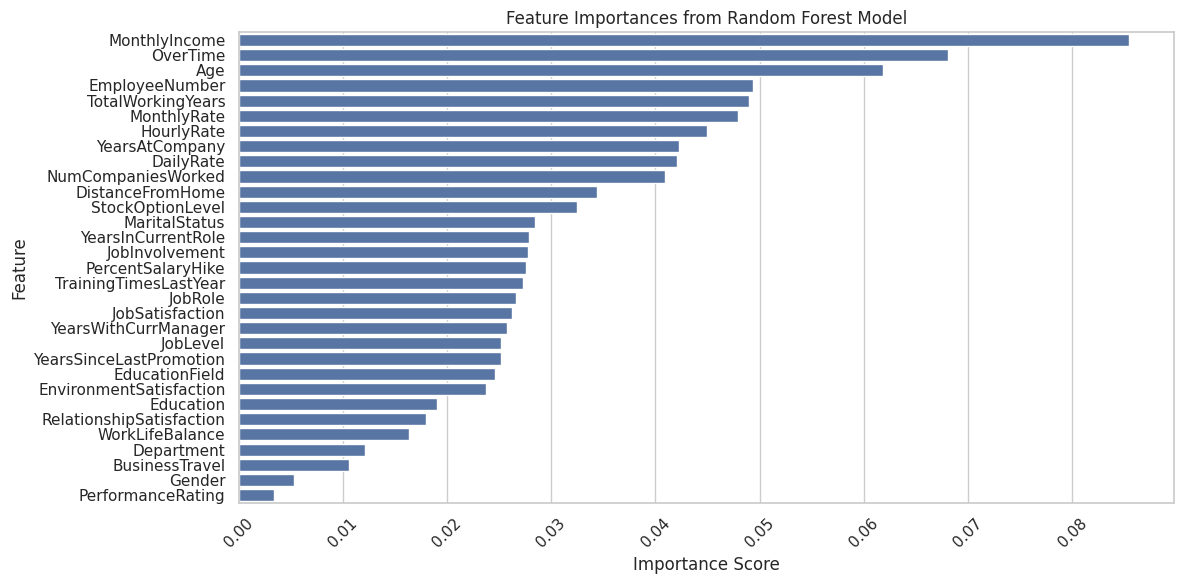

In [47]:
# Get the feature importances from the trained Random Forest model
importances = rf_cv.best_estimator_.feature_importances_

# Sort the indices of the importance values in descending order
sorted_indices = np.argsort(importances)[::-1]

# Create a DataFrame that contains the feature names and their corresponding importance scores
features_df = pd.DataFrame({
    'Feature': X.columns[sorted_indices],
    'Importance': importances[sorted_indices]
})

# Create a bar plot to visualize feature importances using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bagging with KNN (12 points)

In [49]:
# Implement Bagging with KNN using BaggingClassifier
bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=best_k), n_estimators=50, random_state=42)

# Fit the BaggingClassifier on the scaled training data
bagging_knn.fit(X_train_scaled, y_train)

# Use the trained Bagging model for predictions on the test data
y_pred_bagging_knn = bagging_knn.predict(X_test_scaled)

# Print the Bagging KNN model accuracy and classification report
accuracy_bagging_knn = accuracy_score(y_test, y_pred_bagging_knn)
print(f'Bagging KNN Model Accuracy: {accuracy_bagging_knn:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bagging_knn))

Bagging KNN Model Accuracy: 0.8081

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       214
           1       0.69      0.16      0.26        57

    accuracy                           0.81       271
   macro avg       0.75      0.57      0.57       271
weighted avg       0.79      0.81      0.76       271



Visualize the confusion matrix for Baggin KNN predictions

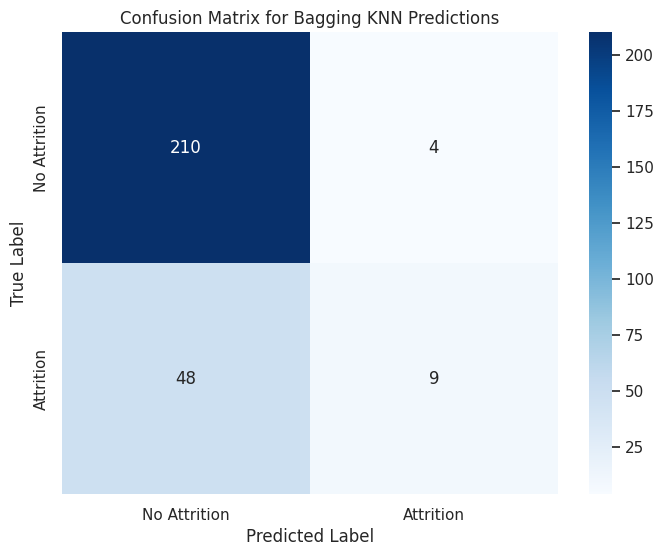

In [50]:
# Create a confusion matrix for Bagging KNN predictions
conf_matrix_bagging_knn = confusion_matrix(y_test, y_pred_bagging_knn)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bagging_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix for Bagging KNN Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# AdaBoost Model (12 points)

In [51]:
# Implement AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# Set up a hyperparameter tuning process for AdaBoost using GridSearchCV
param_grid_ada = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}

# GridSearchCV with AdaBoost
adaboost_cv = GridSearchCV(adaboost, param_grid_ada, cv=5)

# Fit the GridSearchCV on the training data to find the best parameters
adaboost_cv.fit(X_train_scaled, y_train)

# Use the best AdaBoost model for predictions on the test data
y_pred_adaboost = adaboost_cv.best_estimator_.predict(X_test_scaled)

# Print the AdaBoost model accuracy and classification report using sklearn's metrics
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f'AdaBoost Model Accuracy: {accuracy_adaboost:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred_adaboost))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost Model Accuracy: 0.8635

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       214
           1       0.88      0.40      0.55        57

    accuracy                           0.86       271
   macro avg       0.87      0.69      0.74       271
weighted avg       0.87      0.86      0.84       271



Visualize the confusion matrix for AdaBoost predictions

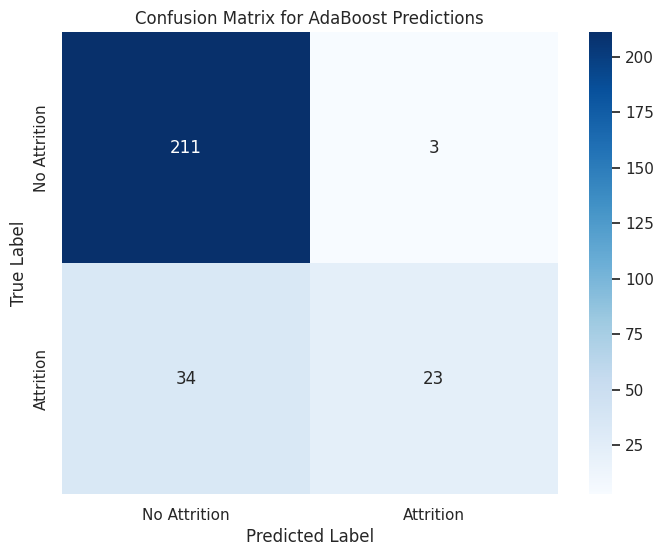

In [52]:
# Create a confusion matrix for AdaBoost predictions
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix for AdaBoost Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model Comparison (4 points)

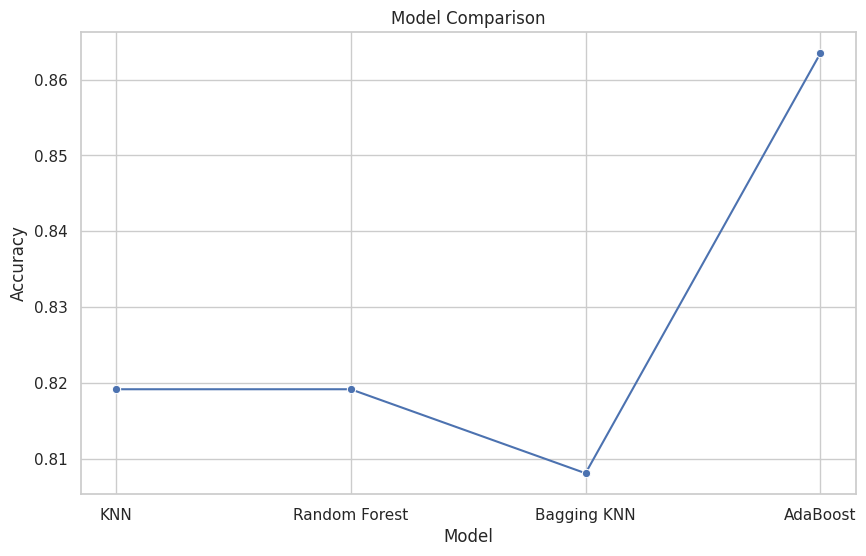

In [53]:
# Compare model accuracies for KNN, Random Forest, Bagging KNN, and AdaBoost
model_accuracies = {
    'Model': ['KNN', 'Random Forest', 'Bagging KNN', 'AdaBoost'],
    'Accuracy': [accuracy_best, accuracy_rf, accuracy_bagging_knn, accuracy_adaboost]
}

accuracy_df = pd.DataFrame(model_accuracies)

# Visualize the model comparison using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Accuracy', data=accuracy_df, marker='o')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()